# Machine Learning : Crop Recommendation
## By : Bettahar Ilyes

## Introduction 

Nowadays, precision agriculture is a popular trend. It involves using modern farming techniques that utilize data on soil characteristics, soil types, crop yield data, weather conditions, and other factors to suggest the optimal crop to grow on a farmer's land for maximum yield and profit. This technique has the potential to reduce crop failures and enable farmers to make informed decisions about their farming strategies.
<br>
To address the current agrarian crisis, better recommendation systems are needed to assist farmers in making informed decisions before embarking on crop cultivation.

## Goal

The objective is to provide farmers with recommendations for the most suitable crops to cultivate based on various parameters. This will enable them to make informed decisions before beginning the cultivation process.

## Data Description

Here I will outline the definitions of the columns in the titanic dataset. <br>
**N:** Nitrogen <br>
**P:** Phosphorous <br>
**K:** Potassium <br>
**Temperature:** The average soil temperatures for bioactivity range from 50 to 75F. <br>
**Humidity:** The amount of Humidity in the air. <br>
**Ph:** A scale used to identify acidity or basicity nature; (Acid Nature- Ph<7; Neutral- Ph=7; Base Nature-P>7) <br>
**Rainfall:** The amount of rainfall in mm. <br>
**label:** Types of Crop (Rice,Maize, Chickpea; Kidney beans; pigeonpeas; mothbeans; mungbean;blackgram; lentil;
pomegranate; banana; mango; grapes; watermelon; muskmelon; apple; orange;papaya; coconut; cotton; jute; coffee)

## I.Import Data


In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Crop_recommendation.csv")

## II.Exploratory Data Analysis

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [6]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


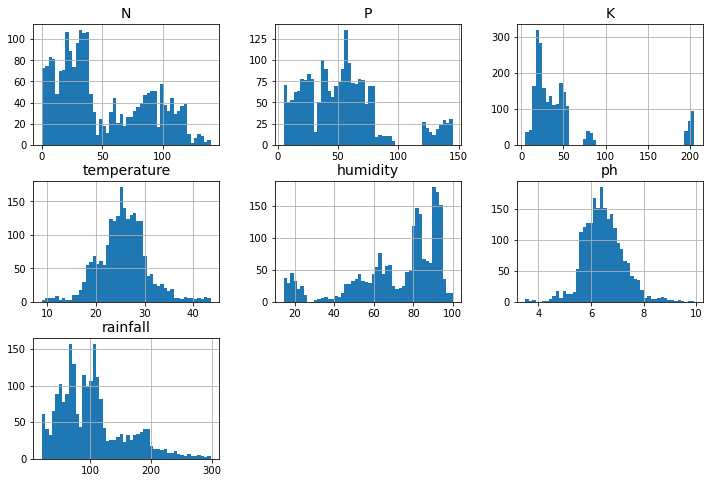

In [7]:
# plot a histogram for each numerical attribute
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

## III.Split The Data Into Training/Test Sets

In [8]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    data, test_size=0.2, stratify=data["label"], random_state=42)

In [9]:
strat_train_set["label"].value_counts()

orange         80
grapes         80
coconut        80
papaya         80
pomegranate    80
mango          80
jute           80
watermelon     80
rice           80
maize          80
pigeonpeas     80
blackgram      80
apple          80
muskmelon      80
coffee         80
mungbean       80
lentil         80
banana         80
cotton         80
mothbeans      80
kidneybeans    80
chickpea       80
Name: label, dtype: int64

In [10]:
strat_test_set["label"].value_counts()

orange         20
banana         20
pigeonpeas     20
mungbean       20
lentil         20
papaya         20
coconut        20
coffee         20
jute           20
kidneybeans    20
apple          20
mango          20
grapes         20
mothbeans      20
pomegranate    20
watermelon     20
blackgram      20
rice           20
chickpea       20
maize          20
cotton         20
muskmelon      20
Name: label, dtype: int64

In [11]:
strat_train_set.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1607,0,18,14,29.771494,92.007200,7.207991,114.416179,orange
1212,9,122,201,29.587484,80.919344,5.570291,68.064173,grapes
362,11,71,24,21.140114,22.718235,5.606620,141.605672,kidneybeans
566,38,38,18,26.310518,61.187491,6.294130,35.734038,mothbeans
1671,18,12,8,12.590940,91.816688,6.206053,119.391672,orange
1917,100,46,18,24.185862,76.042040,6.431690,69.080567,cotton
1015,83,79,55,25.147480,83.346882,5.565029,98.666794,banana
1694,6,13,9,34.514240,90.561515,7.786725,118.327197,orange
1222,36,133,198,25.519397,83.983517,6.228645,69.172812,grapes
846,2,79,15,21.535779,65.472277,7.505284,35.751076,lentil


In [12]:
strat_test_set.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1609,13,23,6,23.961476,90.264080,7.365338,102.695870,orange
1072,98,79,50,25.341198,84.473213,6.435917,91.064934,banana
1912,140,38,15,24.147295,75.882986,6.021440,69.915635,cotton
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1645,40,22,6,24.536101,91.909972,6.488221,115.978799,orange
221,25,68,77,20.093406,15.112796,7.701446,85.749049,chickpea
28,60,49,44,20.775761,84.497744,6.244841,240.081065,rice
701,25,62,21,26.734340,68.139997,7.040056,67.150964,blackgram
1097,110,71,54,28.672089,82.207936,5.725419,94.379875,banana
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange


## IV. Discover And Visualize The Data

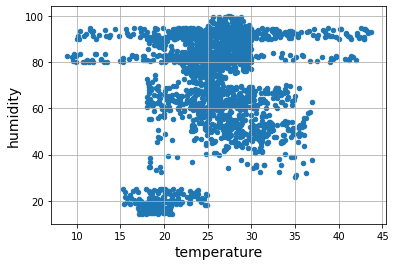

In [13]:
data.plot(kind="scatter", x="temperature", y="humidity", grid=True)
plt.show()

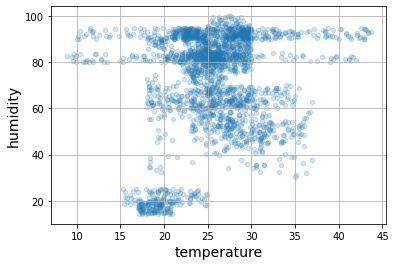

In [14]:
data.plot(kind="scatter", x="temperature", y="humidity", grid=True,alpha=0.2)
plt.show()

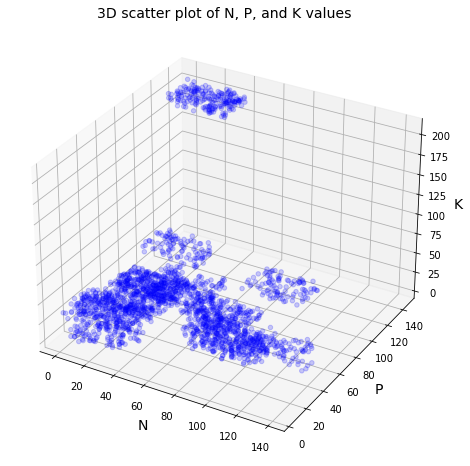

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of N, P, and K
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['N'], data['P'], data['K'], c='blue', alpha=0.2)

# Set the axis labels and plot title
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')
ax.set_title('3D scatter plot of N, P, and K values')

# Display the plot
plt.show()


### Looking for Correlations

In [16]:
corr_matrix = data.corr()
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


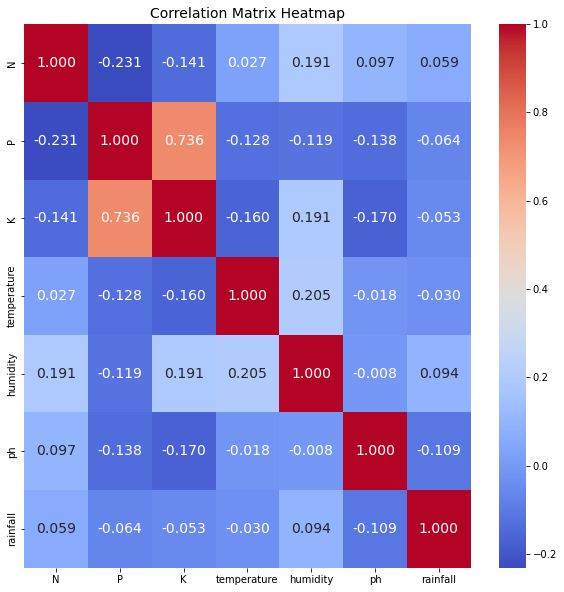

In [17]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix Heatmap')
plt.show()

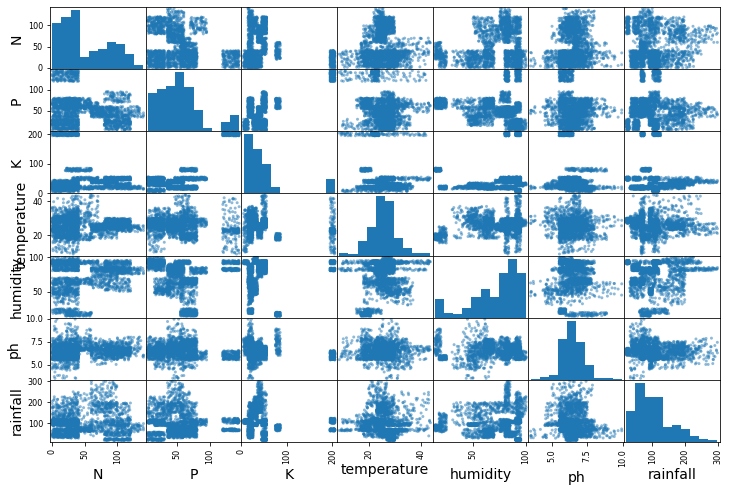

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["N", "P", "K","temperature","humidity","ph","rainfall"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

## V.Train Model 

In [19]:
Xtrain = strat_train_set.drop("label", axis=1)
Ytrain = strat_train_set["label"].copy()
Xtest = strat_test_set.drop("label", axis=1)
Ytest = strat_test_set["label"].copy()

In [20]:
acc = []
model = []

### V.1.Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9431818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.68      0.65      0.67        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      0.95      0.97        20
      coffee       1.00      1.00      1.00        20
      cotton       0.80      1.00      0.89        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.89      0.85      0.87        20
       maize       0.83      0.75      0.79        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.75      0.75      0.75        20
    mungbean       1.00      0.95      0.97        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00   

#### K-fold Cross-validation With Logistic Regression

In [22]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(random_state=2)
scores = cross_val_score(logreg, Xtrain, Ytrain, cv=10)
print("Logistic Regression's Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Logistic Regression's Accuracy for each fold: [0.95454545 0.96590909 0.96590909 0.93181818 0.98295455 0.96590909
 0.97159091 0.95454545 0.97159091 0.9375    ]
Mean accuracy: 0.9602272727272727


#### Hyperparameter Trining For Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
logreg = LogisticRegression(random_state=2)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain, Ytrain)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9636363636363636


### V.2.Guassian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
y = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", y)
print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00 

#### K-fold Cross-validation With Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
NaiveBayes = GaussianNB()
scores = cross_val_score(NaiveBayes, Xtrain, Ytrain, cv=10)
print("Naive Bayes's Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Naive Bayes's Accuracy for each fold: [0.99431818 1.         1.         0.98295455 1.         1.
 0.99431818 1.         0.98863636 0.98863636]
Mean accuracy: 0.9948863636363635


There are no hyperparameters to tune for Gaussian Naive Bayes in scikit-learn. The model assumes that the features are independent and normally distributed, and there are no hyperparameters to control these assumptions. 

### V.3.Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
z = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Trees's Accuracy is: ", z*100)
print(classification_report(Ytest,predicted_values))

Decision Trees's Accuracy is:  89.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       0.95      1.00      0.98        20
   blackgram       0.61      0.95      0.75        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      0.95      0.97        20
      cotton       0.77      1.00      0.87        20
      grapes       1.00      1.00      1.00        20
        jute       0.00      0.00      0.00        20
 kidneybeans       1.00      0.70      0.82        20
      lentil       0.95      1.00      0.98        20
       maize       0.88      0.70      0.78        20
       mango       1.00      0.85      0.92        20
   mothbeans       1.00      0.65      0.79        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       0.95      1.00      0.98        20
      orange       1.00      1.0

#### K-fold Cross-validation With Decision Tree


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
scores = cross_val_score(DecisionTree, Xtrain, Ytrain, cv=10, scoring='accuracy')
print("Decision Tree's Accuracy for each fold:",  scores)
print("Mean accuracy:",scores.mean())

Decision Tree's Accuracy for each fold: [0.9375     0.90909091 0.93181818 0.90909091 0.90340909 0.94318182
 0.90340909 0.94886364 0.92045455 0.92045455]
Mean accuracy: 0.9227272727272726


#### Hyperparameter Trining For Decision Tree

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10)
}
dt = DecisionTreeClassifier(random_state=2)
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')
grid_search.fit(Xtrain, Ytrain)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 9}
Best cross-validation score: 0.9823863636363634


### V.4.Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

w = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest's Accuracy is: ", w)

print(classification_report(Ytest,predicted_values))

Random Forest's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.90      0.95        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.91      1.00      0.95        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00

#### K-fold Cross-validation With Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
RF = RandomForestClassifier(n_estimators=20, random_state=0)
scores = cross_val_score(RF, Xtrain, Ytrain, cv=10)
print("Random Forest's Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Random Forest's Accuracy for each fold: [0.99431818 0.99431818 0.99431818 0.98295455 1.         1.
 0.99431818 1.         0.98295455 0.98295455]
Mean accuracy: 0.9926136363636363


#### Hyperparameter Trining For Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=10)
grid_search.fit(Xtrain, Ytrain)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9954545454545455


### Accuracy Comparison

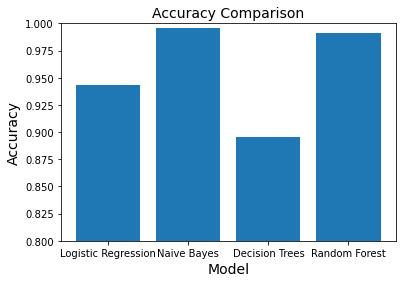

In [32]:
import matplotlib.pyplot as plt
plt.bar(['Logistic Regression', 'Naive Bayes', 'Decision Trees', 'Random Forest'],
        [x, y, z, w])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()


## VI.Conclusion

Based on the results obtained, we can see that the Naive Bayes classifier achieved the highest accuracy of 99.55%, followed by the Random Forest classifier with an accuracy of 99.09%, Logistic Regression with an accuracy of 94.32%, and Decision Trees with an accuracy of 89.55%.
<br>
Therefore, we can conclude that for this particular dataset, the Naive Bayes and Random Forest classifiers performed better than the other two classifiers. It's important to note that the performance of each classifier may vary for different datasets and problem domains, so it's always a good practice to try multiple algorithms and evaluate their performance.